# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


- The past payments (x6-x11) can be used as an indicator of risky behavior. People with higher than 3 can be considered to be defaulting on their 

In [47]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## 1. Data Cleaning

In [48]:
df = pd.read_csv('training_data.csv')
pd.set_option("display.max_columns", 100)

In [49]:
df.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [50]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [51]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [52]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [53]:
df.columns.to_list()

['Unnamed: 0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'Y']

In [54]:
df.rename(columns={"X1":"credit_given",
                   "X2":"gender",
                   "X3":"education",
                   "X4":"marital_status",
                   "X5":"age",
                   "X6":"past_pay_sept",
                   "X7":"past_pay_aug",
                   "X8":"past_pay_july",
                   "X9":"past_pay_june",
                   "X10":"past_pay_may",
                   "X11":"past_pay_april",
                   "X12":"due_pay_sept",
                   "X13":"due_pay_aug",
                   "X14":"due_pay_july",
                   "X15":"due_pay_june",
                   "X16": "due_pay_may",
                   "X17":"due_pay_april",
                   "X18":"amount_paid_sept",
                   "X19":"amount_paid_aug",
                   "X20":"amount_paid_july",
                   "X21":"amount_paid_june",
                   "X22":"amount_paid_may",
                   "X23":"amount_paid_april",
                  }, inplace = True)

In [55]:
df.drop(columns=["Unnamed: 0"], inplace = True)
df.head()

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y
0,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [56]:
df.describe()

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y
count,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500,22500
unique,81,3,8,5,56,12,12,12,12,11,11,17665,17341,17116,16768,16326,16093,6631,6569,6258,5757,5750,5789,3
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,2534,13572,10516,12026,1243,11057,11804,11823,12330,12706,12233,1492,1849,2129,2390,2594,3000,3905,4036,4440,4840,5015,5418,17471


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 24 columns):
credit_given         22500 non-null object
gender               22500 non-null object
education            22500 non-null object
marital_status       22500 non-null object
age                  22500 non-null object
past_pay_sept        22500 non-null object
past_pay_aug         22500 non-null object
past_pay_july        22500 non-null object
past_pay_june        22500 non-null object
past_pay_may         22500 non-null object
past_pay_april       22500 non-null object
due_pay_sept         22500 non-null object
due_pay_aug          22500 non-null object
due_pay_july         22500 non-null object
due_pay_june         22500 non-null object
due_pay_may          22500 non-null object
due_pay_april        22500 non-null object
amount_paid_sept     22500 non-null object
amount_paid_aug      22500 non-null object
amount_paid_july     22500 non-null object
amount_paid_june     22500 non-

In [58]:
df.shape

(22500, 24)

In [59]:
#df.astype(dtype=float)

In [60]:
df.loc[df['credit_given'] =="LIMIT_BAL"]

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y
18381,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [61]:
df.drop(index = 18381, inplace = True)

In [62]:
df=df.astype(dtype=int)

In [63]:
df.describe()

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


In [64]:
df.marital_status.unique()

array([2, 1, 3, 0])

In [94]:
df.education.unique()

array([1, 3, 2, 4, 6, 5, 0])

In [95]:
df.gender.unique()

array([2, 1])

In [104]:
df.loc[:, df.columns.str.startswith("past_pay")].values

array([[ 0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1],
       [-2, -2, -2, -2, -2, -2],
       ...,
       [ 1, -1,  2,  2, -1,  0],
       [-1, -1, -1, -1, -2, -2],
       [ 1,  2,  2,  2,  2,  2]])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 0 to 22499
Data columns (total 24 columns):
credit_given         22499 non-null int64
gender               22499 non-null int64
education            22499 non-null int64
marital_status       22499 non-null int64
age                  22499 non-null int64
past_pay_sept        22499 non-null int64
past_pay_aug         22499 non-null int64
past_pay_july        22499 non-null int64
past_pay_june        22499 non-null int64
past_pay_may         22499 non-null int64
past_pay_april       22499 non-null int64
due_pay_sept         22499 non-null int64
due_pay_aug          22499 non-null int64
due_pay_july         22499 non-null int64
due_pay_june         22499 non-null int64
due_pay_may          22499 non-null int64
due_pay_april        22499 non-null int64
amount_paid_sept     22499 non-null int64
amount_paid_aug      22499 non-null int64
amount_paid_july     22499 non-null int64
amount_paid_june     22499 non-null int64
amount_pa

## 2. EDA

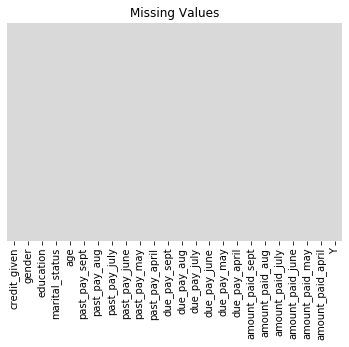

In [66]:
# Missing Values
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Values')
plt.show()

In [67]:
print(df.gender.unique())

[2 1]


0    17471
1     5028
Name: Y, dtype: int64


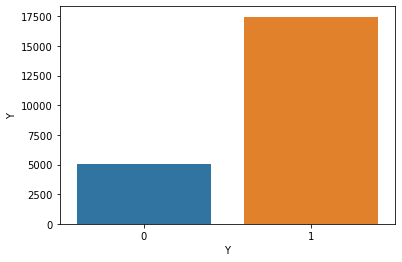

In [77]:
# Checking the class balance -- shows imbalance
target = df["Y"]
target_values = df["Y"].value_counts()
print(target_values)
sns.barplot(x=target, y= target_values);


## 3. Feature Engineering

In [70]:
df["total_due"]= df["due_pay_april"]+df["due_pay_may"]+df["due_pay_june"]+df["due_pay_july"]+df["due_pay_aug"]+df["due_pay_sept"]

In [71]:
df["total_paid"] = df["amount_paid_april"]+df["amount_paid_may"]+df["amount_paid_june"]+df["amount_paid_july"]+df["amount_paid_aug"]+df["amount_paid_sept"]

In [72]:
df["total_bal"]= df.total_due-df.total_paid

In [73]:
df["past_summary"]=df["past_pay_april"]+df["past_pay_may"]+df["past_pay_june"]+df["past_pay_july"]+df["past_pay_aug"]+df["past_pay_sept"]

In [74]:
df.columns


Index(['credit_given', 'gender', 'education', 'marital_status', 'age',
       'past_pay_sept', 'past_pay_aug', 'past_pay_july', 'past_pay_june',
       'past_pay_may', 'past_pay_april', 'due_pay_sept', 'due_pay_aug',
       'due_pay_july', 'due_pay_june', 'due_pay_may', 'due_pay_april',
       'amount_paid_sept', 'amount_paid_aug', 'amount_paid_july',
       'amount_paid_june', 'amount_paid_may', 'amount_paid_april', 'Y',
       'total_due', 'total_paid', 'total_bal', 'past_summary'],
      dtype='object')

In [80]:
df_check1 = df[["total_due", "total_paid", "total_bal", "past_summary", "Y"]]

In [93]:
df_check1.describe()

,total_due,total_paid,total_bal,past_summary,Y
count,2.249900e+04,2.249900e+04,2.249900e+04,22499.000000,22499.000000
mean,2.704738e+05,3.175713e+04,2.387167e+05,-1.064981,0.223477
std,3.822992e+05,6.316932e+04,3.659120e+05,5.909370,0.416584
min,-3.362590e+05,0.000000e+00,-2.671514e+06,-12.000000,0.000000
25%,2.835600e+04,6.600000e+03,4.479000e+03,-5.000000,0.000000
50%,1.253810e+05,1.429300e+04,1.012810e+05,0.000000,0.000000
75%,3.426205e+05,3.350250e+04,3.045435e+05,0.000000,0.000000
max,5.263883e+06,3.764066e+06,4.116080e+06,36.000000,1.000000


In [107]:
df.total_due.max()

5263883

In [109]:
df.loc[df.total_due == 5263883]

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y,total_due,total_paid,total_bal,past_summary
22108,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0,5263883,1147803,4116080,-1


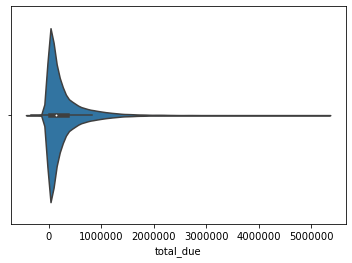

In [106]:
sns.violinplot(df.total_due)

## 2.2 EDA

In [91]:
corr=df_check1.corr()

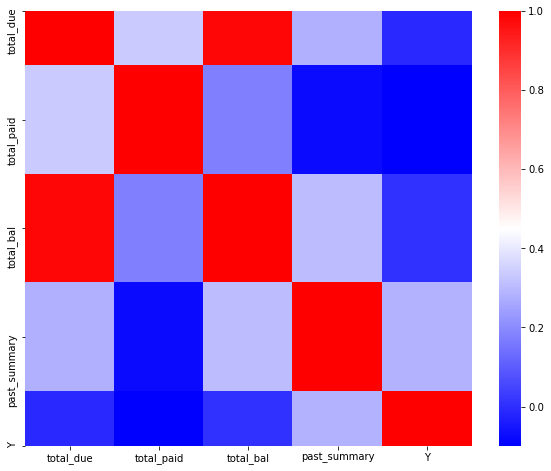

In [92]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, cmap = 'bwr')

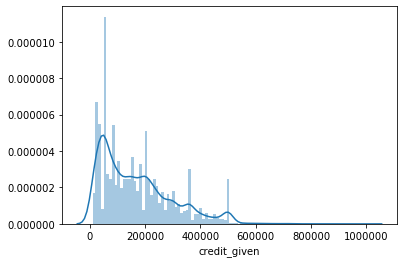

In [112]:
sns.distplot(df["credit_given"], bins = 100)


In [127]:
def violinplot(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.violinplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, split = True)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

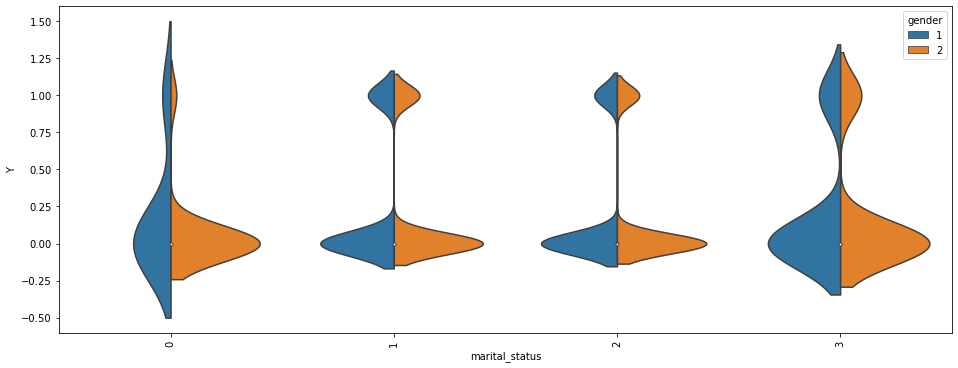

In [128]:
violinplot("marital_status", "Y", "gender")

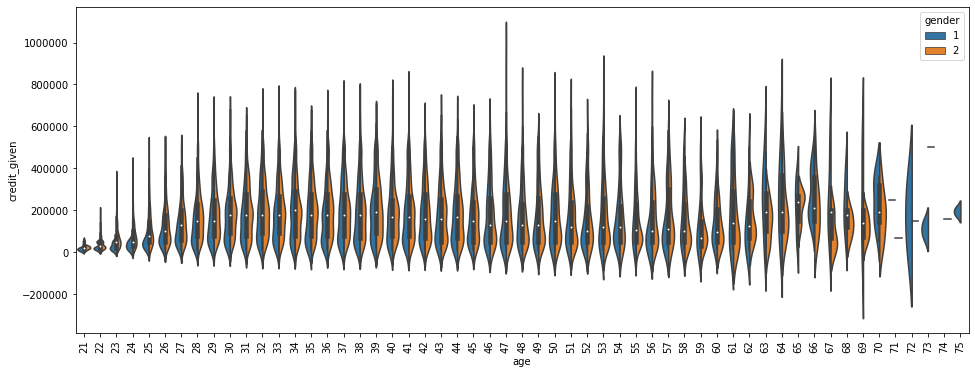

In [131]:
violinplot("age", "credit_given", "gender")

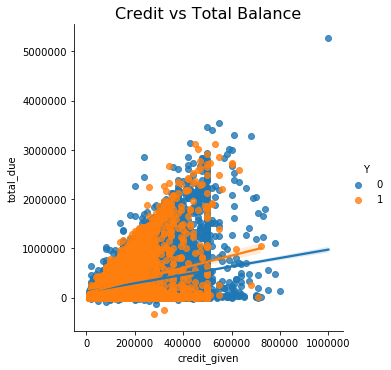

In [141]:
sns.lmplot(x='credit_given', y= 'total_due', data = df, hue ='Y')
plt.title('Credit vs Total Balance', size=16);
#Cannot distinguish between Default and Non-default


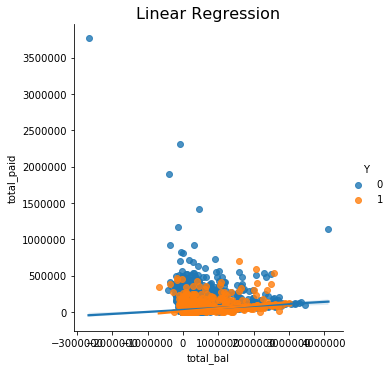

In [142]:
sns.lmplot(x='total_bal', y= 'total_paid', data = df, hue ='Y')
plt.title('Linear Regression', size=16);
#Cannot distinguish between Default and Non-default

In [147]:
df.loc[df["total_paid"]>3500000] # really weird... always paid 200% more than what was due... 

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y,total_due,total_paid,total_bal,past_summary
4316,340000,2,1,3,42,-1,-1,-1,-1,-1,0,139808,176743,34402,205931,265431,270237,873552,1215471,889043,621000,20000,145000,0,1092552,3764066,-2671514,-5


In [148]:
df.loc[df["total_bal"]<0]

,credit_given,gender,education,marital_status,age,past_pay_sept,past_pay_aug,past_pay_july,past_pay_june,past_pay_may,past_pay_april,due_pay_sept,due_pay_aug,due_pay_july,due_pay_june,due_pay_may,due_pay_april,amount_paid_sept,amount_paid_aug,amount_paid_july,amount_paid_june,amount_paid_may,amount_paid_april,Y,total_due,total_paid,total_bal,past_summary
8,180000,2,2,2,35,-2,-2,-2,-2,-2,-2,-117,2573,-77,-77,1823,227,2690,0,0,1900,230,0,0,4352,4820,-468,-12
11,200000,1,2,2,27,-1,-1,-1,-1,-1,-1,1990,2035,1577,2424,671,1606,2035,1577,2424,671,1606,27124,1,10303,35437,-25134,-6
21,510000,2,4,1,34,-2,-2,-1,0,-1,-1,10554,568,22058,23205,11571,12179,1074,22657,11586,24637,12719,20798,0,80135,93471,-13336,-7
27,500000,2,1,1,44,-1,-1,-1,-1,-1,-1,29178,26963,33166,48858,66050,43769,26963,33169,48858,66050,43769,37509,0,247984,256318,-8334,-6
45,50000,2,1,2,24,-1,-1,-1,-1,-1,-1,1303,1303,748,1693,1138,748,1303,748,1693,1138,895,1528,0,6933,7305,-372,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22464,500000,2,1,1,33,-2,-2,-1,-1,-2,-1,125,-18088,1664089,121757,97115,377217,4366,1684259,121831,97670,379267,26759,0,2242215,2314152,-71937,-9
22472,60000,2,2,2,24,3,2,2,2,2,-1,150,150,150,150,150,150,0,0,0,0,150,44399,1,900,44549,-43649,10
22473,40000,2,2,1,43,-1,-1,-1,-1,-1,-1,220,960,960,960,1383,960,960,960,960,1383,960,960,0,5443,6183,-740,-6
22484,230000,2,1,2,26,-2,-1,2,-1,0,-1,-10,1732,476,3157,340,769,2122,0,3157,0,769,1265,0,6464,7313,-849,-3


## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model